# Clustering Project

### Outline:
### Build a machine learning model for clustering customers into  different groups with the help of the dataset given below

### Context: You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual  income and spending score.

### What you need to do?
### You own the mall and want to understand the customers like who can be easily  converted [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.
- 1) Identity the problem type first and then perform Data Cleaning if needed.
- 2) Perform Feature Engineering if needed.
- 3) Check for missing values and replace them using the Simple Imputer from Sk-Learn only. (Choose the best suited strategy for imputation).
- 4) Models to use: 
    #####  You are free to use any clustering technique. But try to use minimum 2 models And more if possible and choose the best one.
- 5) What according to you is the optimal number of clusters.
- 6) Make a plot as well to show the segmentation of customers based on the  Predictions from the model. This plot should be able to distinguish between  the different clusters.

# * Importing the Dependencies (Libraries)

In [1]:
# Importing Libraries
import seaborn as sns
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

# * Data Collection & Analysis

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# count of duplicated rows in the data
data.duplicated().sum()

0

In [8]:
(data.isnull().sum()/data.shape[0])*100

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [9]:
corr =  data.corr()
corr.style.background_gradient(axis=None)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


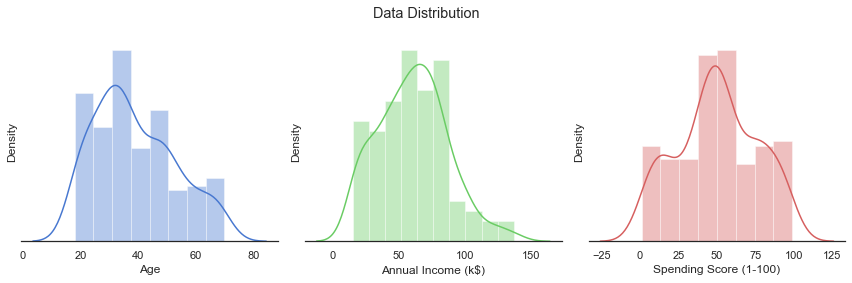

In [10]:
sns.set(style='white', palette='muted', color_codes=True)
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
sns.despine(left=True)
axs[0] = sns.distplot(data['Age'], ax=axs[0])
axs[1] = sns.distplot(data['Annual Income (k$)'],  ax=axs[1], color='g')
axs[2] = sns.distplot(data['Spending Score (1-100)'], ax=axs[2], color='r')

fig.suptitle('Data Distribution')
plt.setp(axs, yticks=[])
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

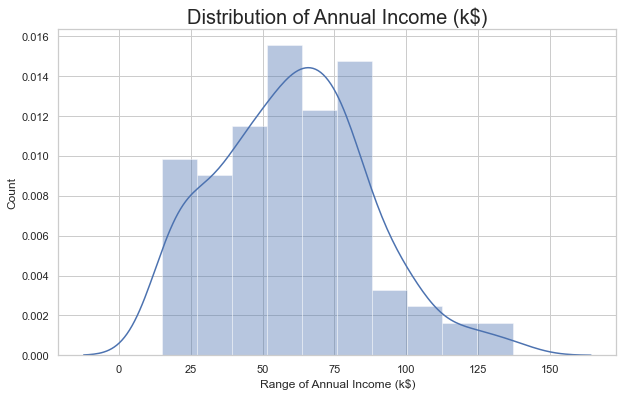

In [11]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

# *EDA & Data Visualization

In [12]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [13]:
genders = data.Gender.value_counts()

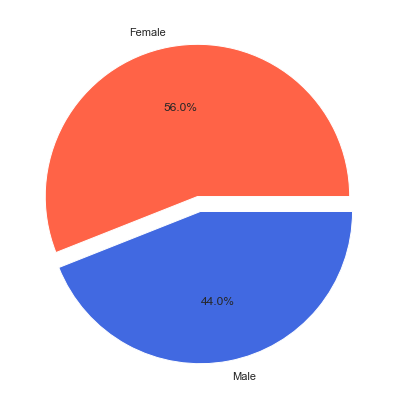

In [14]:
#visualization
labels=genders.index
explode=[0,0.1]
colors=['tomato','royalblue']
plt.figure(figsize=(7,7))
plt.pie(genders,labels=labels,explode=explode,colors=colors,autopct='%1.1f%%')
plt.show()

##### - More Female customers than male customers .

In [15]:
df = data.copy()

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df1 = df.iloc[:,[1,2,3,4]]
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


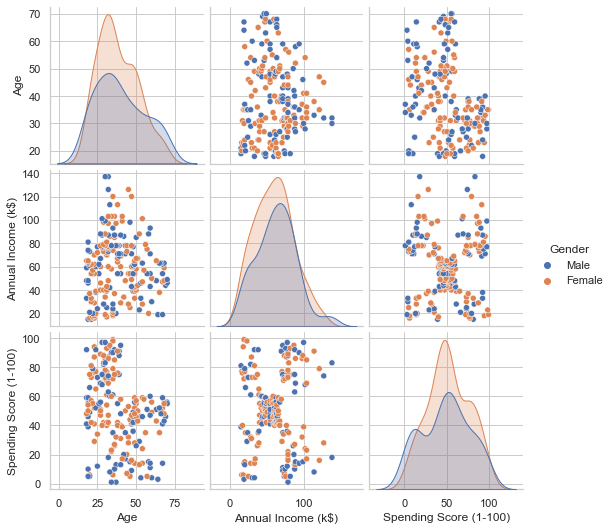

In [18]:
sns.pairplot(df1,hue='Gender')

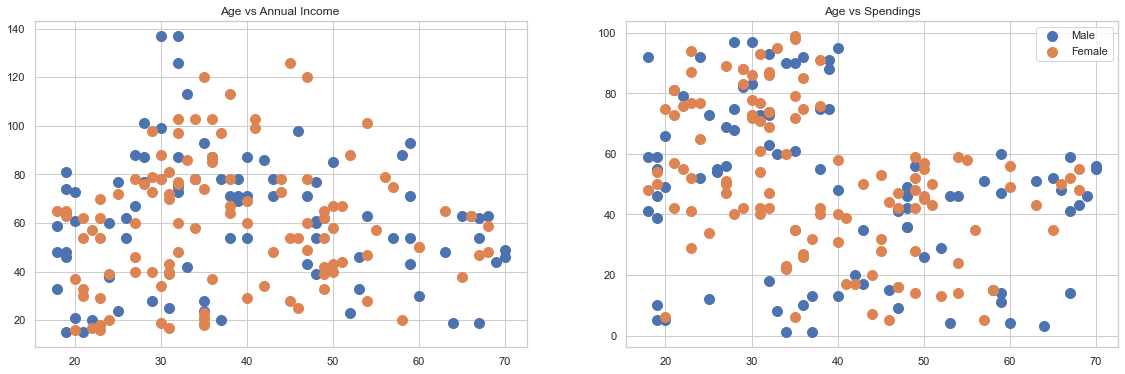

In [19]:
plt.figure(figsize=(30,6))
plt.subplot(1,3,1)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,label = gender,s=100)
    plt.title('Age vs Annual Income ')
plt.subplot(1,3,2)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age',y = 'Spending Score (1-100)' ,data = df[df['Gender'] == gender] ,s = 100 , label = gender)
    plt.title('Age vs Spendings')
plt.legend()
plt.show()

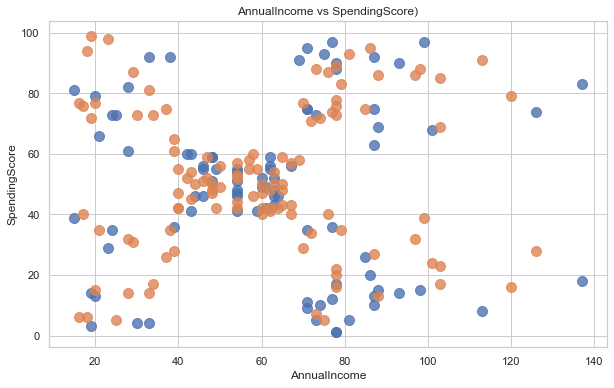

In [20]:
plt.figure(figsize=(10,6))
for gender in data.Gender.unique():
    plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=df[df['Gender']==gender],s=100,alpha=.8)
    plt.xlabel('AnnualIncome')
    plt.ylabel('SpendingScore')
    plt.title('AnnualIncome vs SpendingScore)')
plt.show()

# *Clustering for Customer segmentation

# 1) K_means Clustering Model

###  Clustering based on 2 features
##### - Annual income and Spending Score

In [21]:
X=df[["Annual Income (k$)","Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [22]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

### Choosing the number of clusters
### Elbow-curve
### WCSS -> Within Clusters Sum of Squares

In [23]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

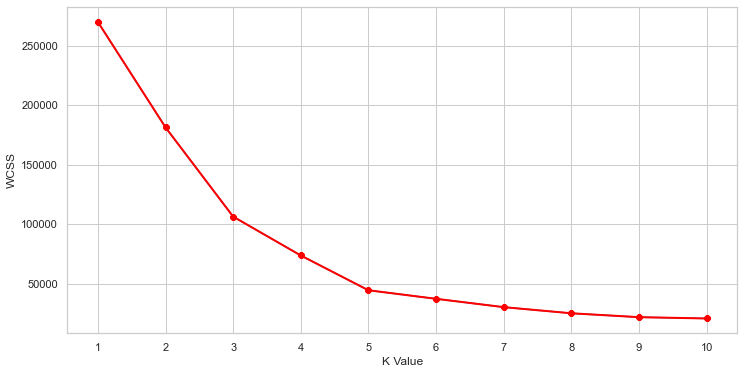

In [24]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

##### Optimal value of K is 5

### Training the K-Means Clustering Model

In [25]:
#Taking 5 clusters
km1=KMeans(n_clusters=5,random_state=0)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)

In [26]:
#adding the labels to a column named label
df["label"] = y
#The new dataframe with the clustering done
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


### Visualizing all the Clusters

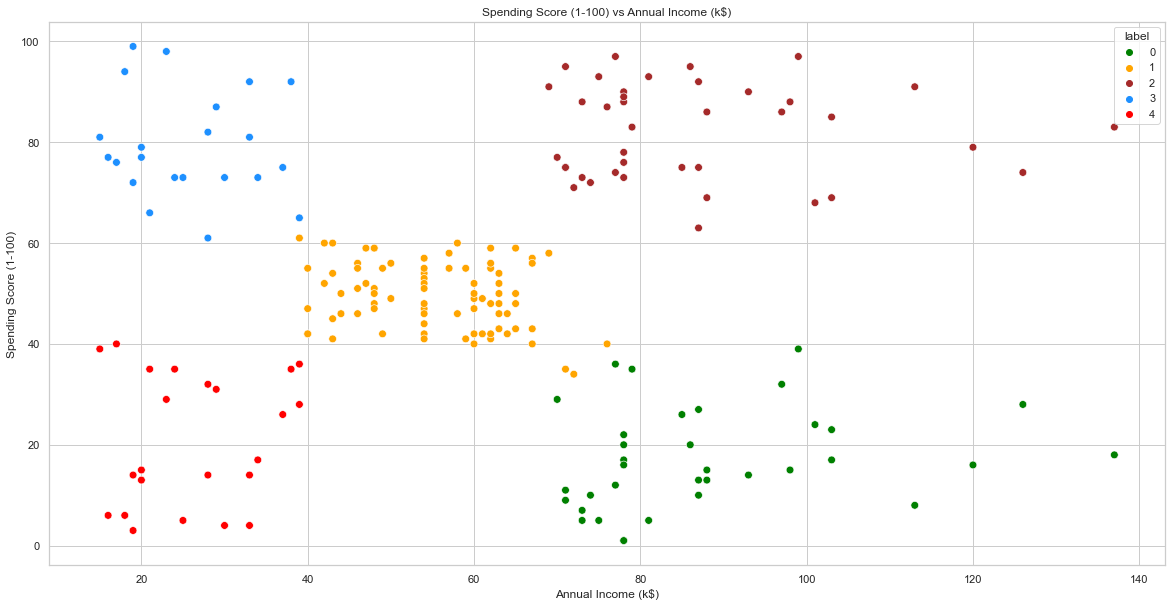

In [27]:
#plotting of the clusters
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df  ,s = 60 )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

## Clustering  based on of 3 features 
##### - Age,Annual Income ,Spending Score 

In [28]:
data_3 = data.copy()

In [29]:
data_3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Choosing the number of clusters
### Elbow-curve
### WCSS -> Within Clusters Sum of Squares

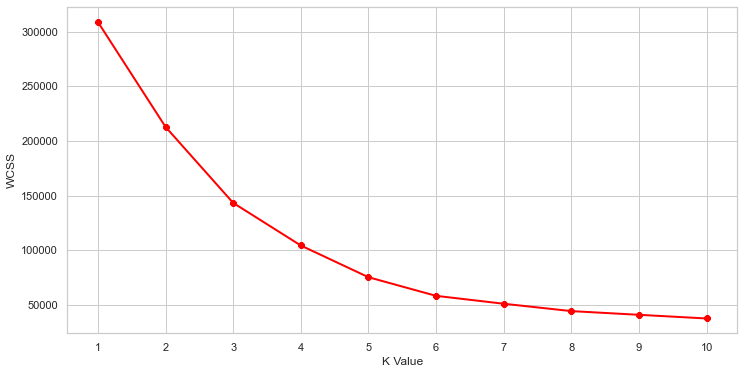

In [30]:
#Taking the features
X2=data_3[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

##### Optimal value of K is 5

### Silhouette analysis

In [31]:
for num_clusters in list(range(2,11)):
    # intialise kmeans
    kmeans = KMeans(n_clusters = num_clusters, max_iter=50)
    kmeans.fit(X2)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.293166070535953
For n_clusters=3, the silhouette score is 0.3839349967742105
For n_clusters=4, the silhouette score is 0.40546302077733304
For n_clusters=5, the silhouette score is 0.44428597560893024
For n_clusters=6, the silhouette score is 0.4523443947724053
For n_clusters=7, the silhouette score is 0.4398198217929885
For n_clusters=8, the silhouette score is 0.42627498428462474
For n_clusters=9, the silhouette score is 0.4145986922068124
For n_clusters=10, the silhouette score is 0.3821612678565957


In [32]:
kmc = silhouette_score(X2, cluster_labels)

### Training the K-Means Clustering Model

In [33]:
km2 = KMeans(n_clusters=5,random_state=0)
km2.fit(X2)
y2 = km2.fit_predict(X2)

In [34]:
data_3["label"] = y2
#The data with labels
data_3.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


### Visualizing all the Clusters

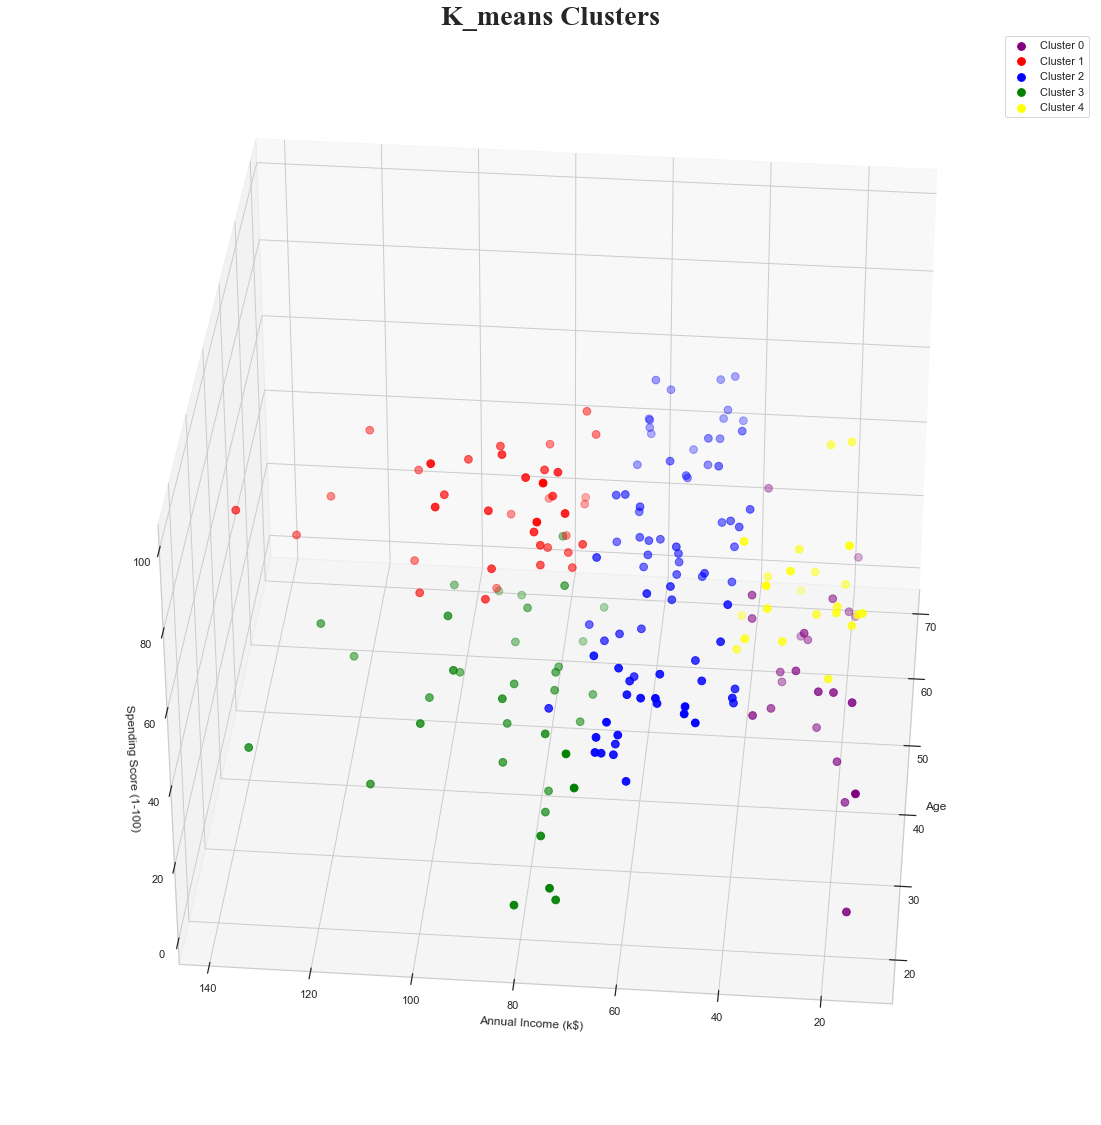

In [35]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3.Age[data_3.label == 0], data_3["Annual Income (k$)"][data_3.label == 0], data_3["Spending Score (1-100)"][data_3.label == 0], c='purple', s=60,label = "Cluster 0")
ax.scatter(data_3.Age[data_3.label == 1], data_3["Annual Income (k$)"][data_3.label == 1], data_3["Spending Score (1-100)"][data_3.label == 1], c='red', s=60,label = "Cluster 1")
ax.scatter(data_3.Age[data_3.label == 2], data_3["Annual Income (k$)"][data_3.label == 2], data_3["Spending Score (1-100)"][data_3.label == 2], c='blue', s=60,label = "Cluster 2")
ax.scatter(data_3.Age[data_3.label == 3], data_3["Annual Income (k$)"][data_3.label == 3], data_3["Spending Score (1-100)"][data_3.label == 3], c='green', s=60,label = "Cluster 3")
ax.scatter(data_3.Age[data_3.label == 4], data_3["Annual Income (k$)"][data_3.label == 4], data_3["Spending Score (1-100)"][data_3.label == 4], c='yellow', s=60,label = "Cluster 4")
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.title('K_means Clusters', fontname="Times New Roman", size=28,fontweight="bold")
plt.show()

In [36]:
cust1=data_3[data_3["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=data_3[data_3["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=data_3[data_3["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=data_3[data_3["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=data_3[data_3["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 2nd group= 79
They are - [ 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 127 143]
--------------------------------------------
Number of customer in 3rd group= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
--------------------------------------------
Number of customer in 4th group= 36
They are - [125 129 131 133 135 137 139 141 145 147 149 151 153 155 157 159 161 163
 165 167 169 171 173 175 177 179 181 183 185 187 18

# 2) Hiearchical Model
## Agglomerative Clustering with 3 features

In [37]:
hrx3 = data.copy()

In [38]:
hrx=hrx3[["Age","Annual Income (k$)","Spending Score (1-100)"]]
hrx

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [39]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### Dendogram

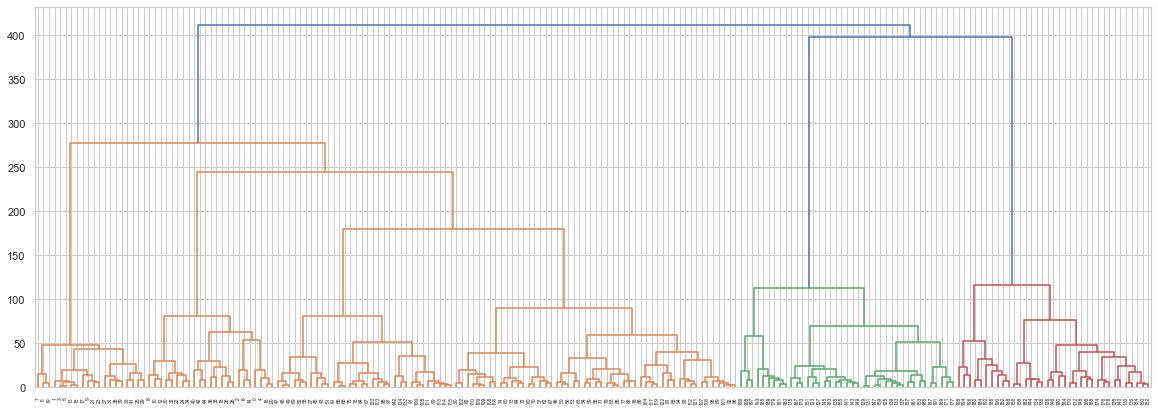

In [40]:
plt.figure(figsize=(20,7))
dendrogram = sch.dendrogram(sch.linkage(hrx,method='ward'))

### Training Hiearchical Model by AgglomerativeClustering

In [41]:
Agm = AgglomerativeClustering(n_clusters=5 ,affinity='euclidean',linkage  ='ward')
cluster_label = Agm.fit_predict(hrx)
cluster_label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [42]:
hrx3['cluster_label'] = cluster_label
hrx3

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [43]:
aggl = silhouette_score(hrx, cluster_label)

### Visualizing all the Clusters from Hiearchical Clustering Model

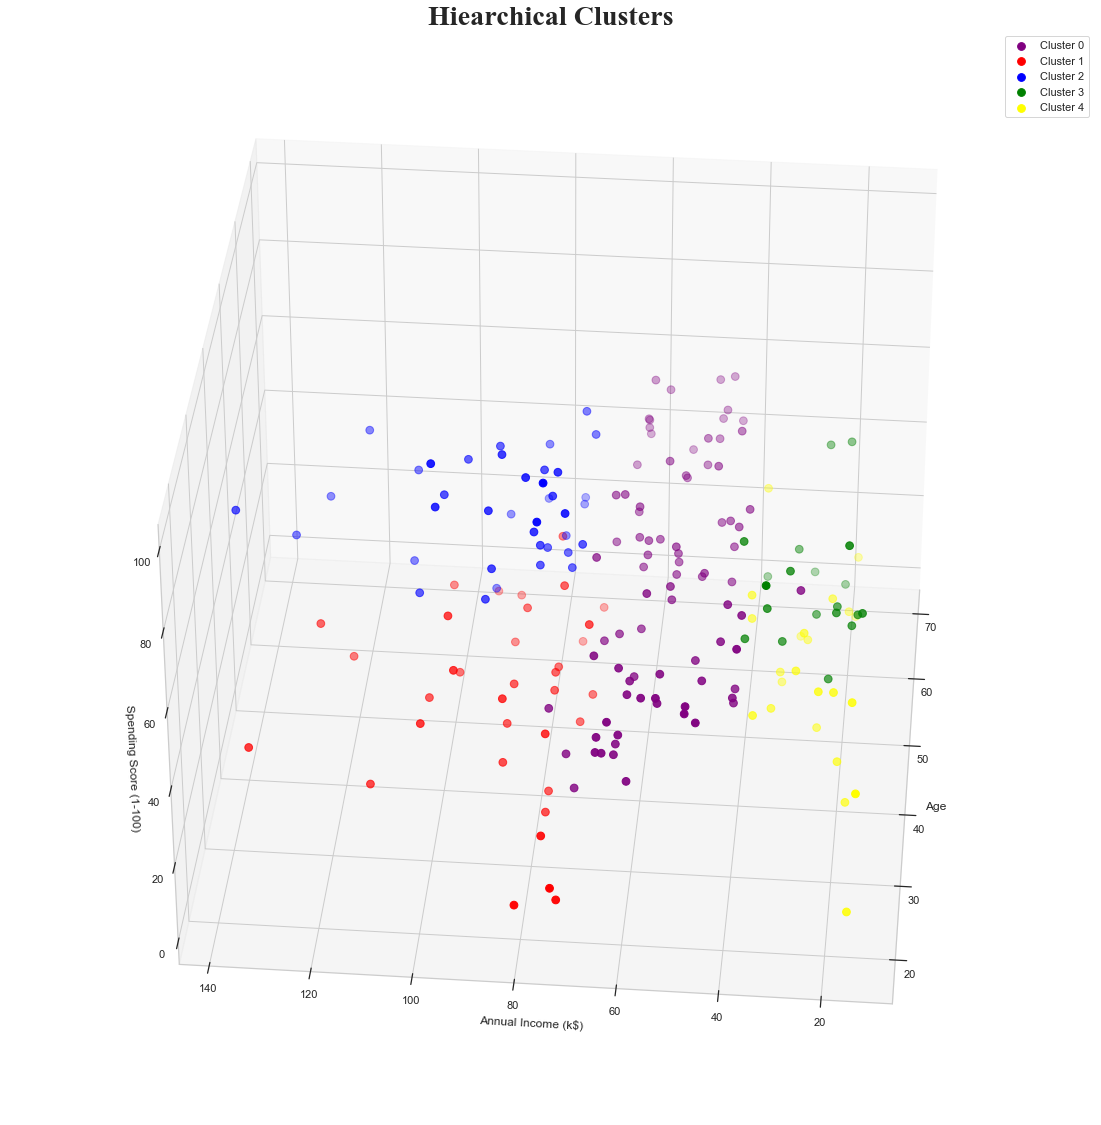

In [44]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hrx3.Age[hrx3.cluster_label == 0], hrx3["Annual Income (k$)"][hrx3.cluster_label == 0], hrx3["Spending Score (1-100)"][hrx3.cluster_label == 0], c='purple', s=60,label = "Cluster 0")
ax.scatter(hrx3.Age[hrx3.cluster_label == 1], hrx3["Annual Income (k$)"][hrx3.cluster_label == 1], hrx3["Spending Score (1-100)"][hrx3.cluster_label == 1], c='red', s=60,label = "Cluster 1")
ax.scatter(hrx3.Age[hrx3.cluster_label == 2], hrx3["Annual Income (k$)"][hrx3.cluster_label == 2], hrx3["Spending Score (1-100)"][hrx3.cluster_label == 2], c='blue', s=60,label = "Cluster 2")
ax.scatter(hrx3.Age[hrx3.cluster_label == 3], hrx3["Annual Income (k$)"][hrx3.cluster_label == 3], hrx3["Spending Score (1-100)"][hrx3.cluster_label == 3], c='green', s=60,label = "Cluster 3")
ax.scatter(hrx3.Age[hrx3.cluster_label == 4], hrx3["Annual Income (k$)"][hrx3.cluster_label == 4], hrx3["Spending Score (1-100)"][hrx3.cluster_label == 4], c='yellow', s=60,label = "Cluster 4")
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.title('Hiearchical Clusters', fontname="Times New Roman", size=28,fontweight="bold")
plt.show()

In [45]:
cust1=hrx3[hrx3["cluster_label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=hrx3[hrx3["cluster_label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=hrx3[hrx3["cluster_label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=hrx3[hrx3["cluster_label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=hrx3[hrx3["cluster_label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 35
They are - [127 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
Number of customer in 2nd group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
--------------------------------------------
Number of customer in 3rd group= 83
They are - [ 28  44  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 125 133 143]
--------------------------------------------
Number of customer in 4th group= 20
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24

# 3) DBScan Model (Density Based Clustering)

In [46]:
dbs = data.copy()

In [47]:
dbs.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
db=dbs[["Age","Annual Income (k$)","Spending Score (1-100)"]]
db

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [49]:
from sklearn.cluster import DBSCAN

In [50]:
dbx = DBSCAN(eps=11, min_samples=6).fit(db)

In [51]:
dbx.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1,  0, -1, -1,
       -1,  0, -1,  0, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2, -1,  2, -1,  2, -1,  2,  3,  2, -1,  2, -1,  2,
        3,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3,  2,  3,
        2,  3,  2, -1,  2, -1,  2, -1,  2, -1,  2,  3,  2,  3,  2,  3, -1,
        3,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [52]:
len(set(dbx.labels_))

5

In [53]:
clusters = dbx.labels_

In [54]:
db['cluster_label']= clusters
db

,Age,Annual Income (k$),Spending Score (1-100),cluster_label
0,19,15,39,-1
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,-1
...,...,...,...,...
195,35,120,79,-1
196,45,126,28,-1
197,32,126,74,-1
198,32,137,18,-1


In [55]:
den = silhouette_score(db, cluster_label)

In [56]:
dbs['Labels'] = dbx.labels_

In [57]:
dbs.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,-1


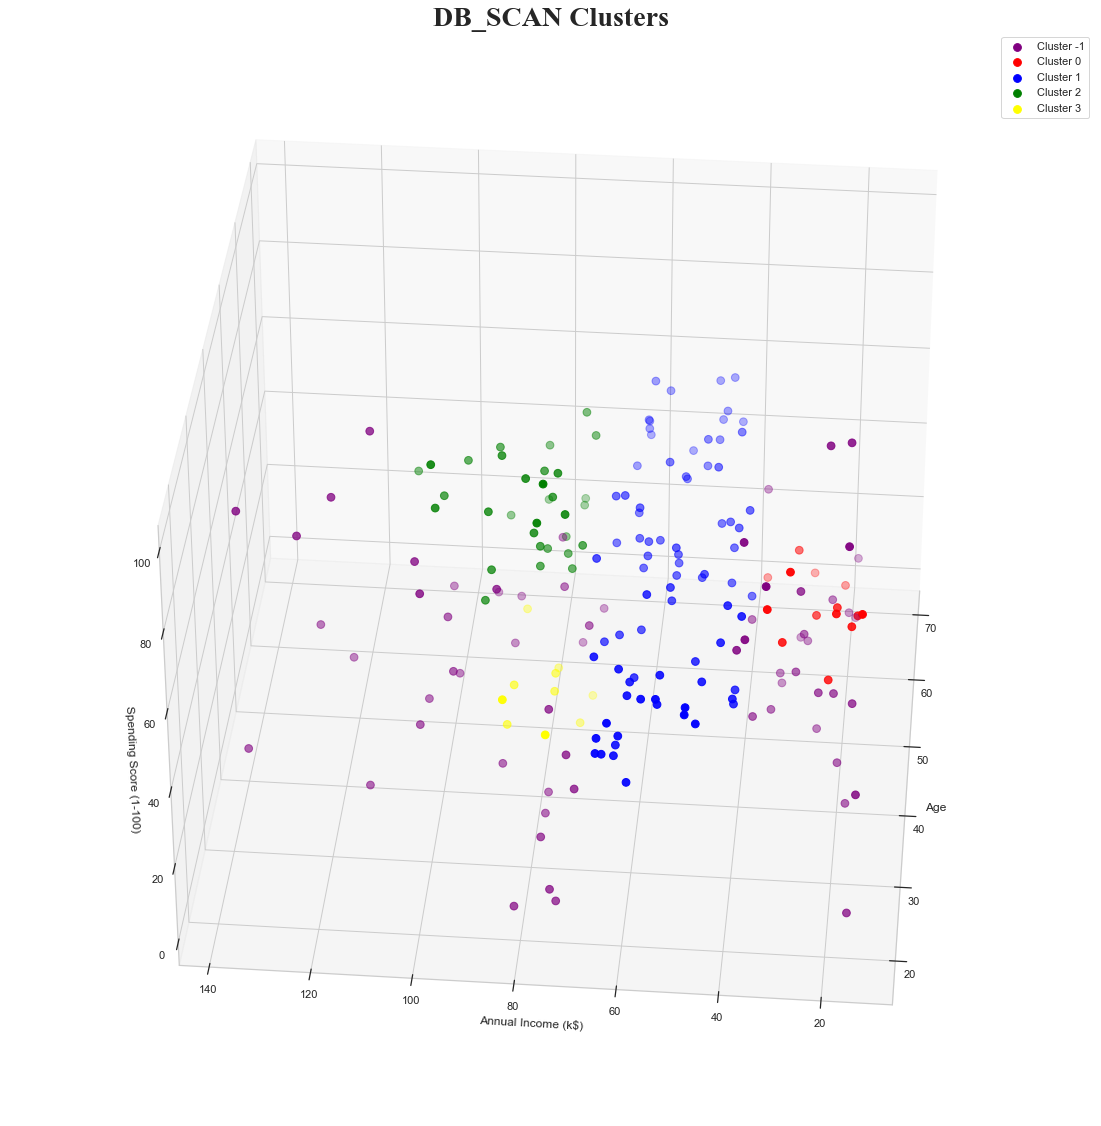

In [58]:
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dbs.Age[dbs.Labels == -1], dbs["Annual Income (k$)"][dbs.Labels == -1], dbs["Spending Score (1-100)"][dbs.Labels == -1], c='purple', s=60,label = "Cluster -1")
ax.scatter(dbs.Age[dbs.Labels == 0], dbs["Annual Income (k$)"][dbs.Labels == 0], dbs["Spending Score (1-100)"][dbs.Labels == 0], c='red', s=60,label = "Cluster 0")
ax.scatter(dbs.Age[dbs.Labels == 1], dbs["Annual Income (k$)"][dbs.Labels == 1], dbs["Spending Score (1-100)"][dbs.Labels == 1], c='blue', s=60,label = "Cluster 1")
ax.scatter(dbs.Age[dbs.Labels == 2], dbs["Annual Income (k$)"][dbs.Labels == 2], dbs["Spending Score (1-100)"][dbs.Labels == 2], c='green', s=60,label = "Cluster 2")
ax.scatter(dbs.Age[dbs.Labels == 3], dbs["Annual Income (k$)"][dbs.Labels == 3], dbs["Spending Score (1-100)"][dbs.Labels == 3], c='yellow', s=60,label = "Cluster 3")
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.title('DB_SCAN Clusters', fontname="Times New Roman", size=28,fontweight="bold")
plt.show()

In [59]:
cust1=dbs[dbs['Labels']==-1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=dbs[dbs['Labels']==0]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=dbs[dbs['Labels']==1]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=dbs[dbs['Labels']==2]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=dbs[dbs['Labels']==3]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 65
They are - [  1   3   5   7   8   9  11  12  13  15  17  19  20  21  23  25  27  28
  29  31  33  34  35  37  39  40  41  42  45  46 125 127 129 133 135 139
 141 143 145 147 157 159 161 163 170 173 175 177 179 181 183 185 187 188
 189 191 192 193 194 195 196 197 198 199 200]
--------------------------------------------
Number of customer in 2nd group= 14
They are - [ 2  4  6 10 14 16 18 22 24 26 30 32 36 38]
--------------------------------------------
Number of customer in 3rd group= 79
They are - [ 43  44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123]
--------------------------------------------
Number of customer in 4th group= 32
They are - [124 126 128 130 132 134 136 138 140 142 144 1

In [64]:
result= {'Models':['K_Means Cluster', 
                      'Hiearchical Cluster', 
                      'DB_Scan Cluster'],
        "Silhouette_Score":[kmc,
                    aggl,
                    den]
        }

result = pd.DataFrame(result)

result.sort_values('Silhouette_Score', ascending=False)

,Models,Silhouette_Score
1,Hiearchical Cluster,0.440189
2,DB_Scan Cluster,0.439860
0,K_Means Cluster,0.382161


The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
# Hiearchical Cluster has more density and more likely well separated 